                                     University of Delaware
                                            BUAD625 
                                        Capstone Project
                                                                                                Name:- Sudarshan Kumar
                                                                                                       Sunil Mathur
                                                                                                       Sally Cao
                                                                                                       Amanda Morley
                                                                                                       Drew McKnight

                       


## Project Title : Bank Marketing

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be subscribed (or not).

The classification goal is to predict if the client will subscribe to a term deposit (variable y).

### Attribute information
For more information, visit https://www.openml.org/d/1461.

Input variables:

**Bank Client Data**:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur", "student","blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

- related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

- other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

- output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

2 = yes; 1 =  no (We are changing this variable so that 1 simply means subscribed)



### EDA Observations:
 
 - The Bank phone marketing campaign data set has 45,211 rows and 17 columns including the target or Y variable.
 - The dataset is very clean with no null values found
 - Some key features that may be potentially important:
     - **Age**: Mean age is 41 years. Range is from 18 - 95 , mid 50% quartile is 33-48
         - **Hypothesis**: Those under 30 and greater than 60 may have more money to be able to open a deposit account
     - **Average Balance**: Mean balance is 1.3 K Range is -8k to 102K
         - **Hypothesis**: Those with more average balance will likely have money to open a deposit account
     - **Housing Loan/Personal Loan**: Either of these increases the liability.
         - **Hypothesis**:People with loans may not have enough money to open a deposit account
     - **Education**: People with higher education are likely to be high earners and may have enough spare cash to open a deposit account.
     - **Job**: People in management / technical jobs versus students / entrepreneurs / self-employed may have more money to open a deposit account.  Retired folks may be good candidates as well.
          - Reasons we find interesting: It has the most categories in a feature compared to the other features and it is something we can leverage in focusing on certain jobs or removing ones that do not seem significanto
     - **Marital Status**: Singles may have more money versus married with family responsibilities
     - **Contact**: Cellular seems to be resulting in higher conversion rates
          - **Hypothesis**: Those with cellular phones may have more disposable income or calling someone on a cellular phone yields a better chance of response.
     - **Credit Default**: people with credit default may not be the best candidates to open a deposit accountoPrevious campaigns - may have a role in someone deciding to open a deposit account
 - **Potential Issues**: Call Duration appears to be highly correlated. However, it is unknown till the end of the call. We are unsure if we should keep or drop this variable as it is highly correlated, however we won’t know the result unless a marketing call is accepted.
 - **Potential Outliers**: In the box plot for the feature ‘previous’ (which is the number oftimes the client was contacted before the campaign) has an outlier where there is one client who was contacted 273 times would be a feature; we would want to remove outliers for so that our dataset would not be skewed if we wanted to keep the‘previous’ feature for our data processing.

#### Recommended variables to focus on: 
 - Duration: highly correlated but we are unsure if this is a fair variable to use given it is necessary for a contact to be contacted definitely.  If we find that itis a valuable variable this could be something that we consider to keep the customer on the phone longer as that seems to lead to more successful conversions.
 - Job type is also an interesting variable to us, we see that students and retiredworkers are highly correlated so we would want to further investigate this.  Perhaps the students are more educated and willing to subscribe and the retirees have more disposable income.
 - Marital type is an interesting variable as those that are single seem to be highly correlated, perhaps those that are married will invest in something else like college funds.
 - The type of contact also seems to make a difference, those that had cellular phones were more likely to subscribe and this could be for reasons like those that have cellular phones have more discretionary income or it is easier to contact them.
 - Previous outcome success is also an interesting variable and could be used topinpoint who we make our calls to. If we call those we had previous success with first this might increase our marketing power.
 
#### Full Pipeline and Model Deployment Summary:
* We created 7 models with accuracies ranging from ~85-90%, the highest being from the Random Forest.
  - Decision Tree
  - Random Forest
  - SVM
  - XGBoost
  - Naive Bayes

* Features we used for the models:
  - age
  - balance
  - day 
  - duration 
  - pdays
  - housing
  - month
  - poutcome
  - contact
  - marital


### Conclusion

Baseline Accuracy for predicting succesful Customer subscription using feature "poutcome" (Previous campaign success) is 88.3 %.
Our best performing model is "Random Forest" with 90.63% accuracy. Based on the random forest, duration seems to be the strongest predictor for whether a customer will subscribe or not with a feature importance score of ~34%. This could be due to the fact that customers who are willing to stay longer on the phone with a bank representative have a higher chance of being persuaded to subscribe to a bank deposit.

### Import Library

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')  # change the default style
cbold='\033[01m'
cEnd = '\033[0m'

### READ DATA 

In [2]:
# read csv data into pandas dataframe
df = pd.read_csv('projectdataset-1.csv')

In [3]:
# basic shape, data type, null values: dataset looks pretty good.  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Class      45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [4]:
# first 5 lines of data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [5]:
# Prepare the data by separating X and y
# dropping Y variable

# axis = 1 below means dropping by columns, 0 means by rows
df.Class.replace((1,2),(0,1), inplace=True) # 0 - Not Subscribed, 1 - Subscribed

X = df.drop(['Class'], axis=1)
y = df['Class']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [6]:
# basic stats
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211.000000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,NaN
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,NaN
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,NaN
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,0.116985
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,0.321406
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,0.000000
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,0.000000
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,0.000000
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,0.000000


### EDA

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

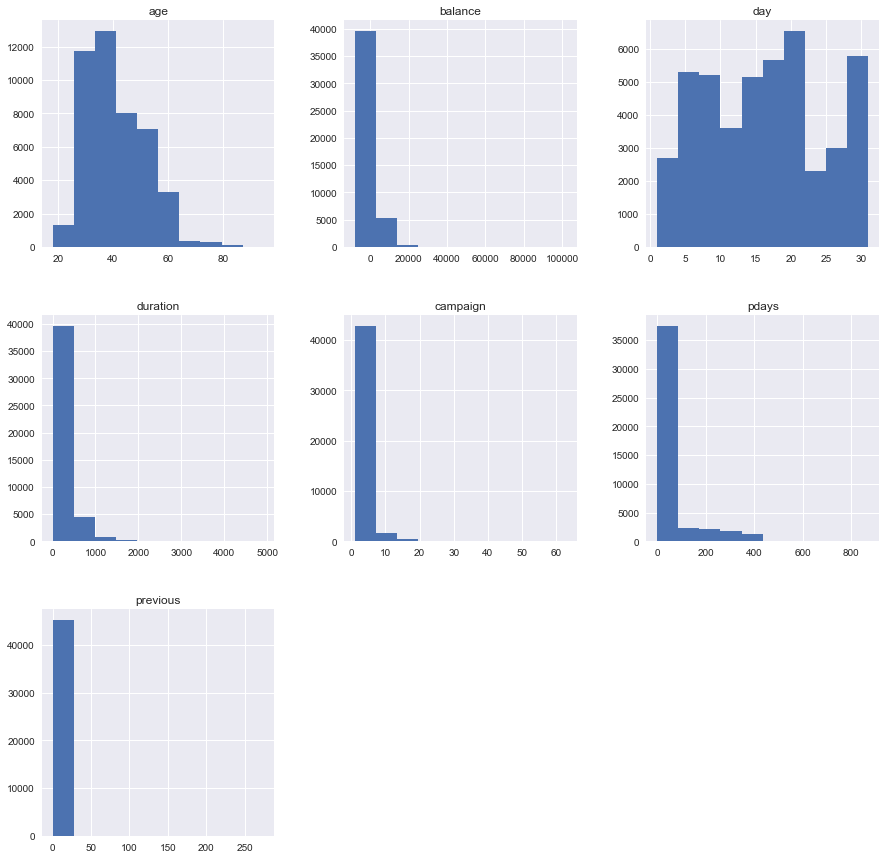

In [7]:
# histograms for all numerical features
X.hist(figsize=(15,15))

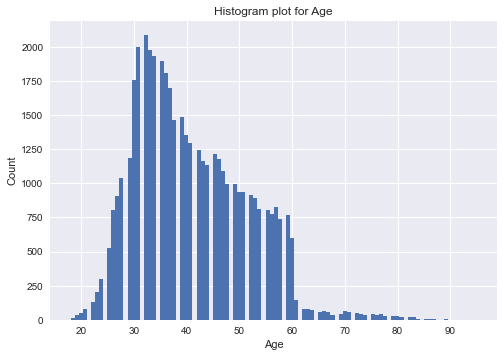

In [8]:
# key findings with potential processing
# long tail (skewed left): log transformation
# some outliers: outlier removal

X['age'].hist(bins=100)
plt.title('Histogram plot for Age')                         
plt.ylabel('Count')                
plt.xlabel('Age')                         
plt.show()


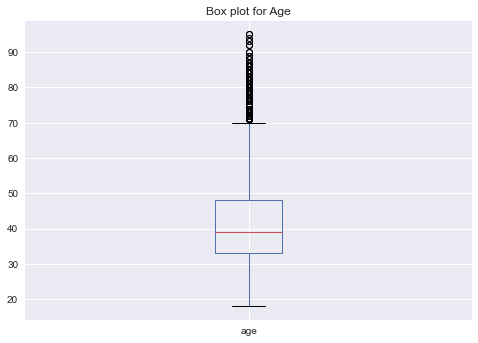

In [9]:
X['age'].plot.box()
plt.title('Box plot for Age')                         
                       
plt.show()

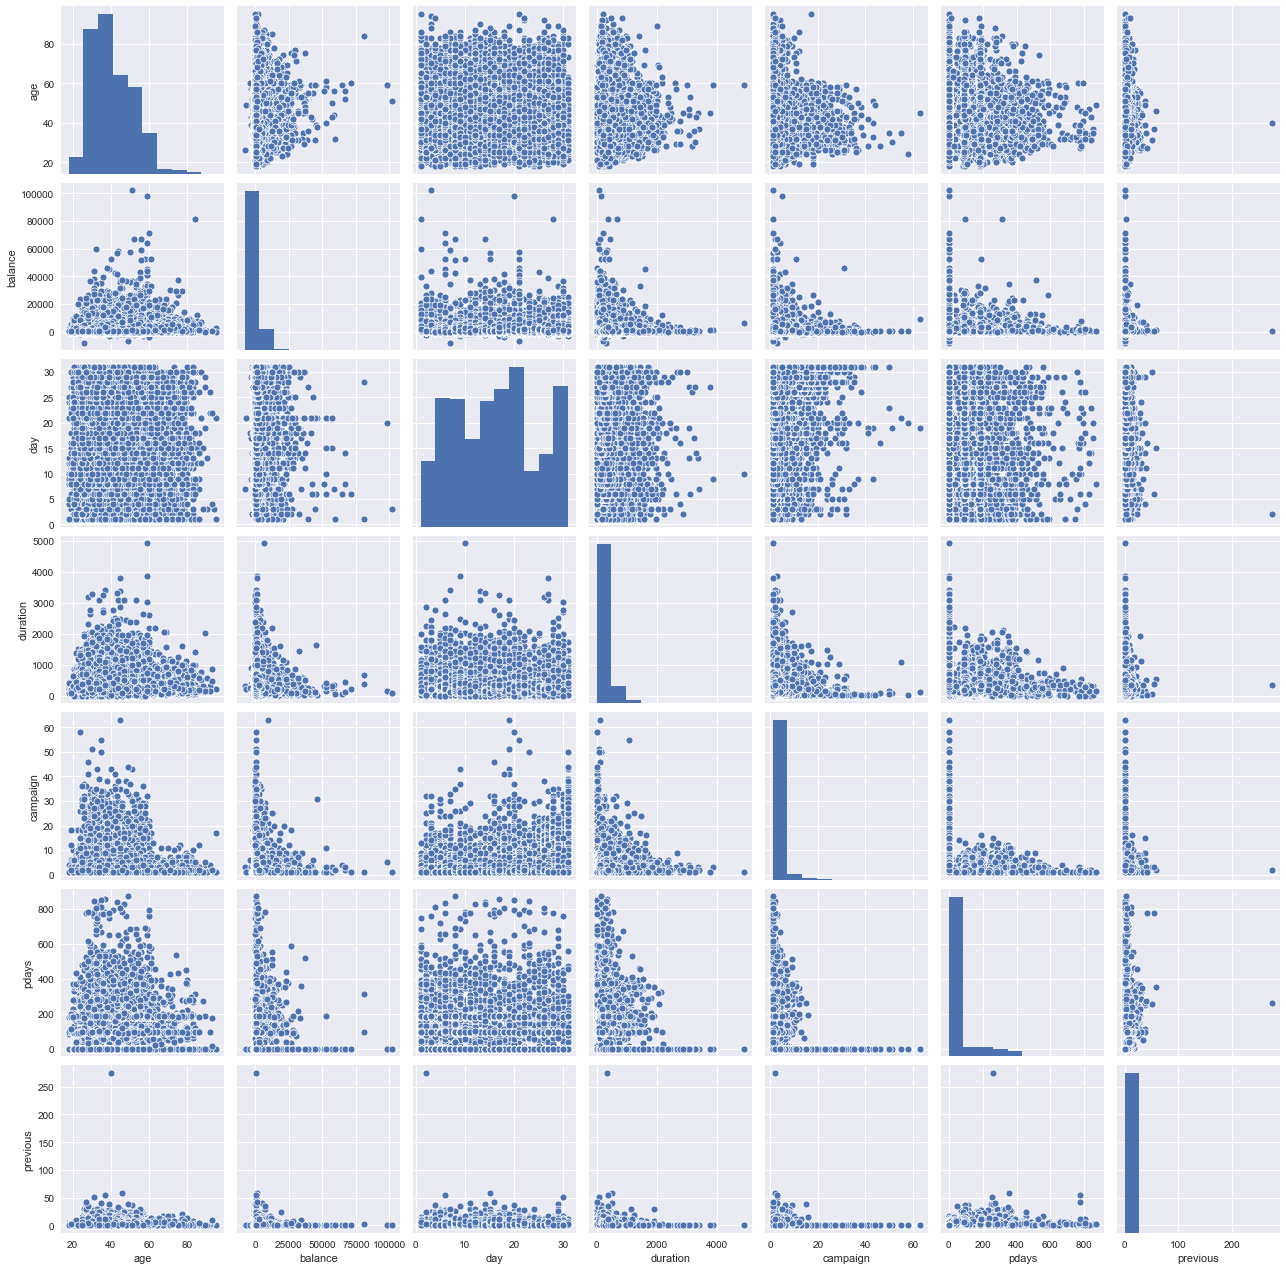

In [10]:
# pairplot example using seaborn
sns.pairplot(data=X)
print("Pair plot")

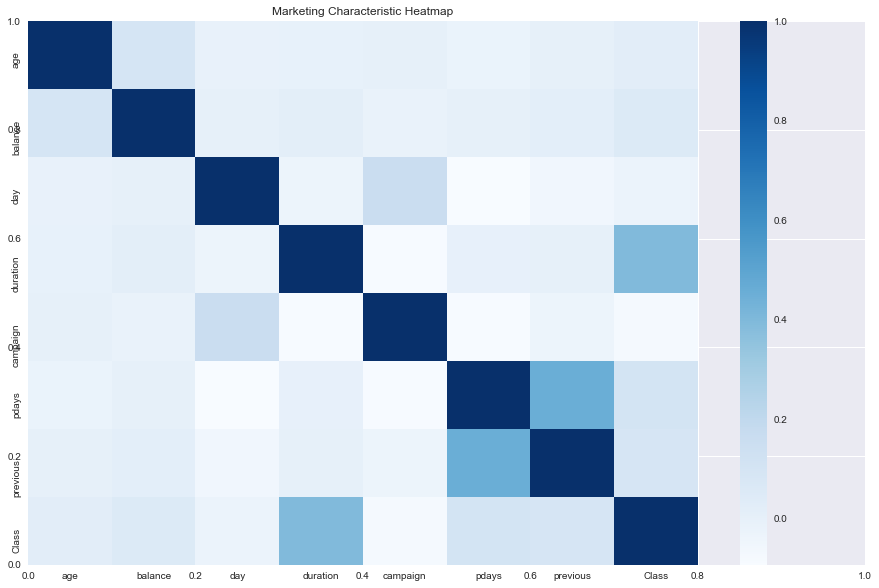

In [11]:
plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("Marketing Characteristic Heatmap")
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Blues")
plt.show()

#For start shows us the duration could be an interesting finding

<AxesSubplot:xlabel='education', ylabel='count'>

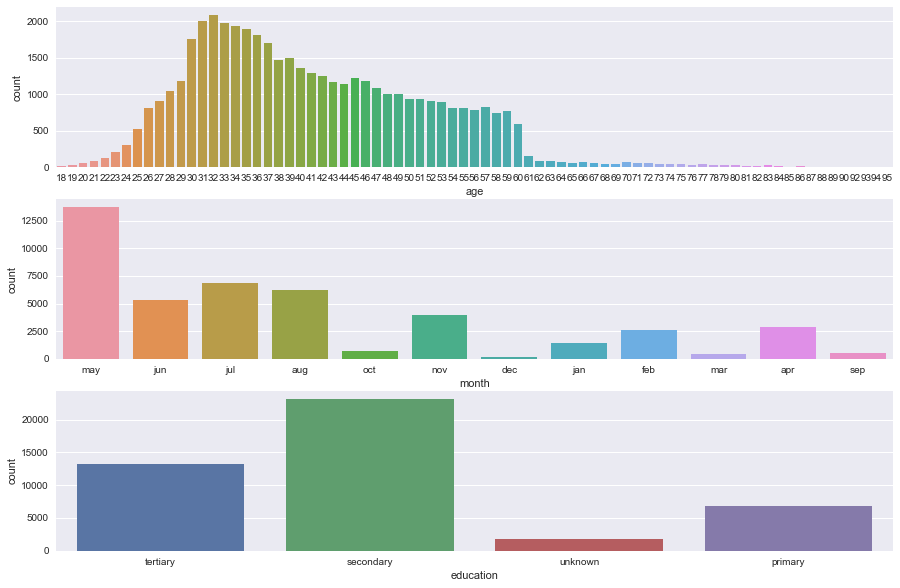

In [12]:
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (15, 10))
print("Count Plot for Age, Month and Education")
sns.countplot(x = "age",data = df, ax=axs[0])
sns.countplot(x = "month", data = df, ax=axs[1])
sns.countplot(x = "education", data = df, ax=axs[2])

#We can see a few graphs that show us a little about the distribution.

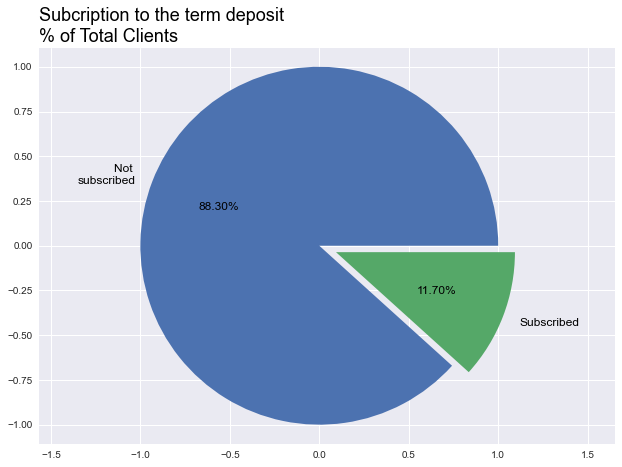

In [13]:
# Pie chart
labels = ["Not \nsubscribed", "Subscribed"]
explode = (0, 0.1)  # only "explode" the second slice (i.e. 'Subscribed')

# depicting the visualization 
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(df['Class'].value_counts(), 
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12)) 

ax.axis('equal') 
plt.title('Subcription to the term deposit\n% of Total Clients',
     loc='left',
     color = 'black', 
     fontsize = '18')

plt.show()

<AxesSubplot:xlabel='age', ylabel='count'>

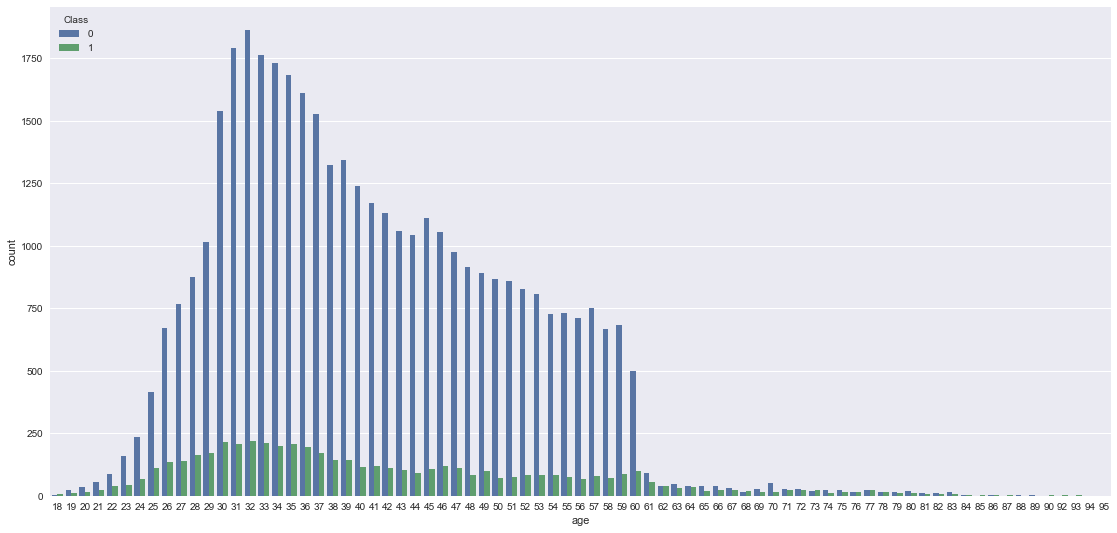

In [14]:
plt.figure(figsize=(19, 9))
sns.countplot(data=df, x='age', hue='Class')

print("Count plot for Age : Subscribed vs Not Subscribed")

In [15]:
#Mean
print("Mean for the numerical feature")
df.groupby(["Class"]).mean().T # transpose makes the output easier to read


Mean for the numerical feature


Class,0,1
age,40.838986,41.670070
balance,1303.714969,1804.267915
day,15.892290,15.158253
duration,221.182806,537.294574
campaign,2.846350,2.141047
pdays,36.421372,68.702968
previous,0.502154,1.170354


<AxesSubplot:xlabel='age', ylabel='balance'>

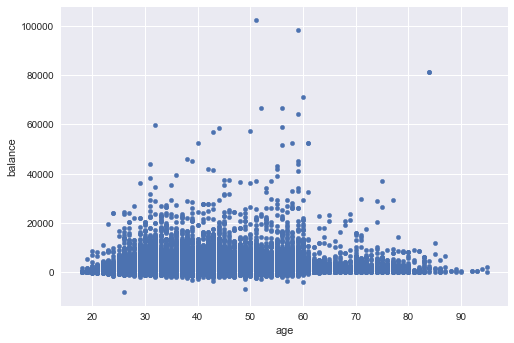

In [16]:
print("Scatter plot for age vs Balance")
df.plot(kind = 'scatter', x='age',y='balance')


From the graph; Age range 50 to 60 seems to have higher balance; hence they are more likly to subscribe.

<AxesSubplot:xlabel='education', ylabel='count'>

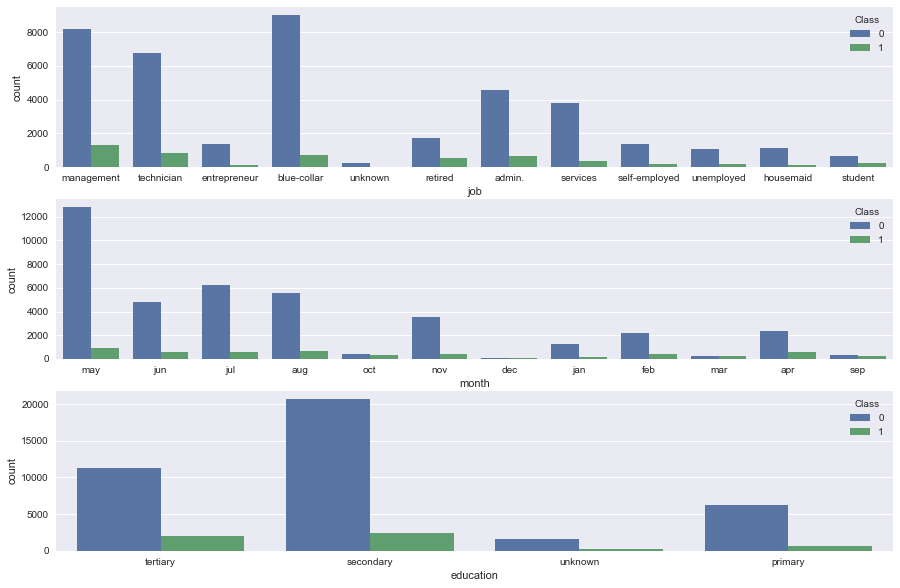

In [17]:
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (15, 10))

sns.countplot(x = "job",data = df, ax=axs[0],hue="Class")
sns.countplot(x = "month", data = df, ax=axs[1],hue="Class")
sns.countplot(x = "education", data = df, ax=axs[2],hue="Class")

### Train Test Split

In [18]:
# Select important Features
#X = X[["duration", "poutcome", "pdays", "housing", "age", "month", "day", "balance", "contact" ]]
#X = X[["duration", "default", "loan", "pdays", "housing", "age", "balance", "contact", "job", "education", "poutcome" ]]
X  = X[['age', 'balance', 'housing', 'contact', 'day', 'month', 'duration',
       'pdays', 'poutcome']]

# Split the data into a training set and a test set. 
# Any number for the random_state is fine, see 42: https://en.wikipedia.org/wiki/42_(number) 
# We choose to use 20% (test_size=0.2) of the data set as the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

##added stratify option above


(36168, 9)
(9043, 9)
(36168,)


### Baseline Prediction

Using Feature "contact" for baseline prediction; Cellular contact subscription rate is highest 14.91 %
 
 
Using Feature "poutcome" for baseline prediction; Previous campaign(poutcome) success subscription rate 64.7% is highest.

In [19]:
# Cellular contact subscription rate: 14.91 %
# Telephone contact subscription rate: 13.42 %
# Unknown contact subscription rate: 4.07 %

group_norm1 = df.groupby('contact')['Class'].value_counts(normalize=True)
print(cbold + "BaseLine Prediction with Contact Feature\n\n" + cEnd,group_norm1)

# based on Previous campaign(poutcome) success ; subscription rate : 64.7%


group_norm2 = df.groupby('poutcome')['Class'].value_counts(normalize=True)
print(cbold + "\nBaseLine Prediction with poutcome Feature\n\n" + cEnd,group_norm2)


BaseLine Prediction with Contact Feature

 contact    Class
cellular   0        0.850811
           1        0.149189
telephone  0        0.865795
           1        0.134205
unknown    0        0.959293
           1        0.040707
Name: Class, dtype: float64

BaseLine Prediction with poutcome Feature

 poutcome  Class
failure   0        0.873903
          1        0.126097
other     0        0.833152
          1        0.166848
success   1        0.647253
          0        0.352747
unknown   0        0.908385
          1        0.091615
Name: Class, dtype: float64


In [20]:
X_test.head()

,age,balance,housing,contact,day,month,duration,pdays,poutcome
1392,40,640,yes,unknown,8,may,347,-1,unknown
7518,44,378,yes,unknown,30,may,203,-1,unknown
12007,31,356,yes,unknown,20,jun,228,-1,unknown
5536,36,655,yes,unknown,23,may,153,-1,unknown
29816,34,1921,yes,cellular,4,feb,61,-1,unknown


In [21]:
# rule-based prediction
baseline_pred1 = X_test['contact'].apply(lambda x: 1 if x == 'cellular' else 0)

# rule-based prediction
baseline_pred2 = X_test['poutcome'].apply(lambda x: 1 if x == 'Success' else 0)


In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, baseline_pred2)

print("Baseline Accuracy Score with Feature 'poutcome' " , {accuracy_score(y_test, baseline_pred2)})

accuracy_score(y_test, baseline_pred1)

print("Baseline Accuracy Score with Feature 'Contact' " , {accuracy_score(y_test, baseline_pred1)})



Baseline Accuracy Score with Feature 'poutcome'  {0.8830034280659074}
Baseline Accuracy Score with Feature 'Contact'  {0.43580670131593496}


We shall choose poutcome feature to compare baseline accuracy. seems like Baseline accuracy with poutcome "Success" is 88.3 %




### Data Preprocessing

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   housing   45211 non-null  object
 3   contact   45211 non-null  object
 4   day       45211 non-null  int64 
 5   month     45211 non-null  object
 6   duration  45211 non-null  int64 
 7   pdays     45211 non-null  int64 
 8   poutcome  45211 non-null  object
dtypes: int64(5), object(4)
memory usage: 3.1+ MB


In [24]:
# We will train our decision tree classifier with the following features:
num_features = ['age', 'balance', 'day',  'duration', 'pdays' ]
cat_features = ['housing', 'contact', 'month', 'poutcome']


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , OneHotEncoder
#from future_encoders import OneHotEncoder # requires future_encoders.py
# Create the preprocessing pipeline for numerical features
# There are two steps in this pipeline
# Pipeline(steps=[(name1, transform1), (name2, transform2), ...]) 
# NOTE the step names can be arbitrary

# Step 1 is what we discussed before - filling the missing values if any using mean
# Step 2 is feature scaling via standardization - making features look like normal-distributed 
# see sandardization: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
num_pipeline = Pipeline(
    steps=[
        ('num_imputer', SimpleImputer()),  # we will tune differet strategies later
        ('scaler', StandardScaler()),
        ]
)

# Create the preprocessing pipelines for the categorical features
# There are two steps in this pipeline:
# Step 1: filling the missing values if any using the most frequent value
# Step 2: one hot encoding

cat_pipeline = Pipeline(
    steps=[
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore')),
    ]
)

# Assign features to the pipelines and Combine two pipelines to form the preprocessor
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)



### Models

Following Models are used.

1. Decision Tree
2. Random Forrest
3. SVM
4. XGBoost
5. Naive Bayes


#### Decision Tree

In [26]:
# Specify the model to use, which is DecisionTreeClassifier
# Make a full pipeline by combining preprocessor and the model
from sklearn.tree import DecisionTreeClassifier

pipeline_dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clf_dt', DecisionTreeClassifier()),
    ]
)

In [27]:
# we show how to use GridSearch with K-fold cross validation (K=10) to fine tune the model
# we use the accuracy as the scoring metric with training score return_train_score=True
from sklearn.model_selection import GridSearchCV

# set up the values of hyperparameters you want to evaluate
# here you must use the step names as the prefix followed by two under_scores to sepecify the parameter names and the "full path" of the steps

# we are trying 2 different impputer strategies 
# 2x5 different decision tree models with different parameters
# in total we are trying 2x2x5 = 20 different combinations

param_grid_dt = [
    {
        'preprocessor__num_pipeline__num_imputer__strategy': ['mean', 'median'],
        'clf_dt__criterion': ['gini', 'entropy'], 
        'clf_dt__max_depth': [3, 4, 5, 6, 7],
   
    }
]

# set up the grid search 
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=10, scoring='accuracy')

In [28]:
# train the model using the full pipeline
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration',
                                                                          'pda

In [29]:
# check the best performing parameter combination
grid_search_dt.best_params_

{'clf_dt__criterion': 'gini',
 'clf_dt__max_depth': 7,
 'preprocessor__num_pipeline__num_imputer__strategy': 'median'}

In [30]:
# build-in CV results keys
sorted(grid_search_dt.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_clf_dt__criterion',
 'param_clf_dt__max_depth',
 'param_preprocessor__num_pipeline__num_imputer__strategy',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'split5_test_score',
 'split6_test_score',
 'split7_test_score',
 'split8_test_score',
 'split9_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [31]:
# test score for the 20 decision tree models
grid_search_dt.cv_results_['mean_test_score']

array([0.90054734, 0.90054734, 0.90035379, 0.90035379, 0.90220622,
       0.90228916, 0.90101753, 0.90104518, 0.90228937, 0.90245525,
       0.89935853, 0.89935853, 0.89982857, 0.89982857, 0.90121094,
       0.90118329, 0.90104509, 0.90101744, 0.90140464, 0.90129404])

In [32]:
# best test score
print('best dt score is: ', grid_search_dt.best_score_)


best dt score is:  0.9024552506477523


In [33]:
# select the best model
# the best parameters are shown, note SimpleImputer() implies that mean strategry is used
clf_best = grid_search_dt.best_estimator_
clf_best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'pdays']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   O

In [34]:
# final test on the testing set
# To predict on new data: simply calling the predict method 
# the full pipeline steps will be applied to the testing set followed by the prediction
y_pred = clf_best.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
clf_best.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num_pipeline',
                                  Pipeline(steps=[('num_imputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('scaler', StandardScaler())]),
                                  ['age', 'balance', 'day', 'duration',
                                   'pdays']),
                                 ('cat_pipeline',
                                  Pipeline(steps=[('cat_imputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehot',
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  ['housing', 'contact', 'month', 'poutcome'])]),
 'clf_dt': DecisionTreeClassifier(max_depth=7)}

In [36]:
clf_best.named_steps['preprocessor']

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'balance', 'day', 'duration',
                                  'pdays']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['housing', 'contact', 'month', 'poutcome'])])

In [37]:
onehot_columns = list(clf_best.named_steps['preprocessor'].named_transformers_['cat_pipeline'].named_steps['onehot'].get_feature_names(input_features=cat_features))



In [38]:
i = clf_best.named_steps["clf_dt"].feature_importances_
i

array([0.04138105, 0.01423975, 0.02157983, 0.49123509, 0.04750922,
       0.04124727, 0.00382411, 0.00375056, 0.        , 0.00991195,
       0.02209235, 0.0008162 , 0.        , 0.00159478, 0.00061306,
       0.        , 0.00448686, 0.02231354, 0.00542562, 0.00164968,
       0.00871744, 0.00302178, 0.        , 0.        , 0.25458985,
       0.        ])

In [39]:
numeric_features_list = list(num_features)
numeric_features_list.extend(onehot_columns)

In [40]:
print(numeric_features_list)


['age', 'balance', 'day', 'duration', 'pdays', 'housing_no', 'housing_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [41]:
import eli5 as eli5
eli5.explain_weights(clf_best.named_steps["clf_dt"], top=50, feature_names=numeric_features_list, feature_filter=lambda x: x != '<BIAS>')

Weight,Feature
0.4912,duration
0.2546,poutcome_success
0.0475,pdays
0.0414,age
0.0412,housing_no
0.0223,month_mar
0.0221,month_apr
0.0216,day
0.0142,balance
0.0099,contact_unknown


In [42]:
r = pd.DataFrame(i, index=numeric_features_list, columns=['importance'])
r

print(r.sort_values('importance', ascending = False))

                   importance
duration             0.491235
poutcome_success     0.254590
pdays                0.047509
age                  0.041381
housing_no           0.041247
month_mar            0.022314
month_apr            0.022092
day                  0.021580
balance              0.014240
contact_unknown      0.009912
month_oct            0.008717
month_may            0.005426
month_jun            0.004487
housing_yes          0.003824
contact_cellular     0.003751
month_sep            0.003022
month_nov            0.001650
month_feb            0.001595
month_aug            0.000816
month_jan            0.000613
month_jul            0.000000
month_dec            0.000000
poutcome_failure     0.000000
poutcome_other       0.000000
contact_telephone    0.000000
poutcome_unknown     0.000000


#### Random Forest

In [43]:
# try random forest classifer
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# rf pipeline
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('clf_rf', RandomForestClassifier()),
])

# here we are trying 2x3 different rf models
param_grid_rf = [
    {
        'clf_rf__criterion': ['gini', 'entropy'], 
        'clf_rf__n_estimators': [50, 100, 150],  
    }
]

# set up the grid search 
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=10, scoring='accuracy')

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36168 entries, 24001 to 44229
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       36168 non-null  int64 
 1   balance   36168 non-null  int64 
 2   housing   36168 non-null  object
 3   contact   36168 non-null  object
 4   day       36168 non-null  int64 
 5   month     36168 non-null  object
 6   duration  36168 non-null  int64 
 7   pdays     36168 non-null  int64 
 8   poutcome  36168 non-null  object
dtypes: int64(5), object(4)
memory usage: 2.8+ MB


In [45]:
%%time
# train the model using the full pipeline
grid_search_rf.fit(X_train, y_train)

Wall time: 7min 55s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration',
                                                                          'pda

In [46]:
# select the best model
# the best parameters are shown, note SimpleImputer() implies that mean strategry is used
clf_best = grid_search_rf.best_estimator_
clf_best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'pdays']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(hand

In [47]:
clf_best.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num_pipeline',
                                  Pipeline(steps=[('num_imputer',
                                                   SimpleImputer()),
                                                  ('scaler', StandardScaler())]),
                                  ['age', 'balance', 'day', 'duration',
                                   'pdays']),
                                 ('cat_pipeline',
                                  Pipeline(steps=[('cat_imputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehot',
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  ['housing', 'contact', 'month', 'poutcome'])]),
 'clf_rf': RandomForestClassifier()}

In [48]:
clf_best.named_steps['preprocessor']

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'balance', 'day', 'duration',
                                  'pdays']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['housing', 'contact', 'month', 'poutcome'])])

In [49]:
i = clf_best['clf_rf'].feature_importances_
i

array([0.1310236 , 0.14364337, 0.11345132, 0.32614233, 0.05066708,
       0.01142248, 0.01052063, 0.00908629, 0.00456229, 0.00917917,
       0.0136944 , 0.00842556, 0.00420847, 0.00818128, 0.00500035,
       0.00817405, 0.01235324, 0.0133811 , 0.00867398, 0.00737479,
       0.01120874, 0.00789165, 0.00725822, 0.00446163, 0.05735843,
       0.01265555])

In [50]:
clf_best['preprocessor'].transformers_

[('num_pipeline',
  Pipeline(steps=[('num_imputer', SimpleImputer()), ('scaler', StandardScaler())]),
  ['age', 'balance', 'day', 'duration', 'pdays']),
 ('cat_pipeline',
  Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                  ('onehot', OneHotEncoder(handle_unknown='ignore'))]),
  ['housing', 'contact', 'month', 'poutcome'])]

In [51]:
# get columnTransformer
clf_best[0] 

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'balance', 'day', 'duration',
                                  'pdays']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['housing', 'contact', 'month', 'poutcome'])])

In [52]:
clf_best[0].transformers_

[('num_pipeline',
  Pipeline(steps=[('num_imputer', SimpleImputer()), ('scaler', StandardScaler())]),
  ['age', 'balance', 'day', 'duration', 'pdays']),
 ('cat_pipeline',
  Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                  ('onehot', OneHotEncoder(handle_unknown='ignore'))]),
  ['housing', 'contact', 'month', 'poutcome'])]

In [53]:
num_original_feature_names = clf_best[0].transformers_[0][2]
num_original_feature_names

['age', 'balance', 'day', 'duration', 'pdays']

In [54]:
cat_original_feature_names = clf_best[0].transformers_[1][2]
cat_original_feature_names

['housing', 'contact', 'month', 'poutcome']

In [55]:
cat_new_feature_names = list(clf_best[0].transformers_[1][1]['onehot'].get_feature_names(cat_original_feature_names))
cat_new_feature_names

['housing_no',
 'housing_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [56]:
feature_names = num_original_feature_names + cat_new_feature_names
feature_names

['age',
 'balance',
 'day',
 'duration',
 'pdays',
 'housing_no',
 'housing_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [57]:
r = pd.DataFrame(i, index=feature_names, columns=['importance'])
r

,importance
age,0.131024
balance,0.143643
day,0.113451
duration,0.326142
pdays,0.050667
housing_no,0.011422
housing_yes,0.010521
contact_cellular,0.009086
contact_telephone,0.004562
contact_unknown,0.009179


In [58]:
r.sort_values('importance', ascending=False)

,importance
duration,0.326142
balance,0.143643
age,0.131024
day,0.113451
poutcome_success,0.057358
pdays,0.050667
month_apr,0.013694
month_mar,0.013381
poutcome_unknown,0.012656
month_jun,0.012353


<AxesSubplot:>

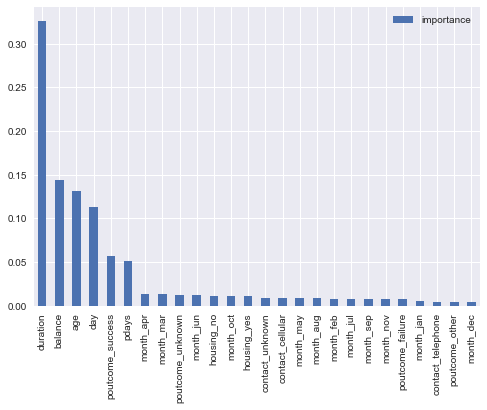

In [59]:
r.sort_values('importance', ascending=False).plot.bar()

In [60]:
# Save the model as a pickle file
import joblib
joblib.dump(clf_best, "clf-best.pickle")

['clf-best.pickle']

In [61]:
# Load the model from a pickle file
saved_tree_clf = joblib.load("clf-best.pickle")
saved_tree_clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'pdays']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(hand

In [62]:
onehot_columns = list(clf_best.named_steps['preprocessor'].named_transformers_['cat_pipeline'].named_steps['onehot'].get_feature_names(input_features=cat_features))

In [63]:
numeric_features_list = list(num_features)
numeric_features_list.extend(onehot_columns)

In [64]:
print(numeric_features_list)

['age', 'balance', 'day', 'duration', 'pdays', 'housing_no', 'housing_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


#### SVM

In [65]:
# try SVM classifer
from sklearn.svm import SVC
np.warnings.filterwarnings('ignore') 

# SVC pipeline
pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('clf_svc', SVC()),
])

# here we are trying three different kernel and three degree values for polynomail kernel
# in total 5 different combinations
param_grid_svc = [
    {
        'clf_svc__kernel': ['linear', 'poly', 'rbf'], 
        'clf_svc__degree': [3, 4, 5],  # only for poly kernel
    }
]

# set up the grid search 
grid_search_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=10, scoring='accuracy')

In [66]:
# train the model using the full pipeline
#grid_search_svc.fit(X_train, y_train)

In [67]:
# best test score
#grid_search_svc.best_score_

#### XG Boost

In [68]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
#X_train['default'] = lbl.fit_transform(X_train['default'].astype(str))
#X_train['loan'] = lbl.fit_transform(X_train['loan'].astype(str))
X_train['housing'] = lbl.fit_transform(X_train['housing'].astype(str))
X_train['contact'] = lbl.fit_transform(X_train['contact'].astype(str))
X_train['month'] = lbl.fit_transform(X_train['month'].astype(str))
X_train['poutcome'] = lbl.fit_transform(X_train['month'].astype(str))
#X_train['job'] = lbl.fit_transform(X_train['job'].astype(str))
#X_train['education'] = lbl.fit_transform(X_train['education'].astype(str))


In [69]:
X_train.head()

,age,balance,housing,contact,day,month,duration,pdays,poutcome
24001,36,861,0,1,29,1,140,-1,1
43409,24,4126,0,0,5,0,907,185,0
20669,44,244,1,0,12,1,1735,-1,1
18810,48,0,0,1,31,5,35,-1,7
23130,38,257,0,0,26,1,57,-1,1


In [70]:

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from sklearn.preprocessing import Imputer

model = xgb.XGBClassifier()

pipeline = Pipeline([
    ('standard_scaler', StandardScaler()), 
    ('pca', PCA()), 
    ('model', model)
])

param_grid = {
    'pca__n_components': [5, 10, 15, 20],
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 100, 500]
}

grid_search_xg = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')



In [71]:
#%%time
grid_search_xg.fit(X_train, y_train)

mean_score = grid_search_xg.cv_results_["mean_test_score"][grid_search_xg.best_index_]
std_score = grid_search_xg.cv_results_["std_test_score"][grid_search_xg.best_index_]

grid_search_xg.best_params_, mean_score, std_score

print(f"Best parameters: {grid_search_xg.best_params_}")
print(f"Mean CV score: {mean_score: .6f}")
print(f"Standard deviation of CV score: {std_score: .6f}")
print(f"Best score: {grid_search_xg.best_score_: .6f}")

[18:28:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters: {'model__max_depth': 7, 'model__n_estimators': 100, 'pca__n_components': 5}
Mean CV score:  0.894718
Standard deviation of CV score:  0.004039
Best score:  0.894718


In [72]:
clf_best = grid_search_xg.best_estimator_
clf_best


Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('pca', PCA(n_components=5)),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=7, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [73]:
# best test score
print('best dt score is: ', grid_search_dt.best_score_)
#print('best svc score is: ', grid_search_svc.best_score_)
print('best rf score is: ', grid_search_rf.best_score_)
print('best xgboost score is: ', grid_search_xg.best_score_)

best dt score is:  0.9024552506477523
best rf score is:  0.9063535929766269
best xgboost score is:  0.8947183340539521


Best performing Model is Random Forrest with accuracy 90.63 %

#### Naive Bayes

In [74]:
NBdf = df
NBdf.Class.replace((1, 2), ('no', 'yes'), inplace=True)
NBdf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


### Features to focus on
* duration - numerical
* job - categorical
* martial - categorical
* contact - categorical
* poutcome - categorical

In [75]:
categorical = [var for var in NBdf.columns if NBdf[var].dtype=='O']

In [76]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'Class']

In [77]:
numerical = [var for var in NBdf.columns if NBdf[var].dtype!='O']

In [78]:
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [79]:
X = NBdf
X = X.drop(['education', 'default', 'housing', 'loan', 'month', 'Class','age', 'balance', 'day','campaign', 'pdays', 'previous'],axis = 1)
X.columns

Index(['job', 'marital', 'contact', 'duration', 'poutcome'], dtype='object')

In [80]:
y = NBdf['Class']

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [82]:
import category_encoders as ce

oneHot = ce.OneHotEncoder(cols=X.columns)
X_train = oneHot.fit_transform(X_train)
X_test = oneHot.transform(X_test)

In [84]:
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
#bayes.fit(X_train, y_train)

In [ ]:
y_pred = bayes.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model Accuracy Score is {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
print('Training-set Accuracy Score is {0:0.4f}'. format(accuracy_score(y_train, bayes.predict(X_train))))

In [ ]:
y_test.value_counts()